<a href="https://colab.research.google.com/github/Nishant0851/Nishant0851/blob/main/Lesson_7_unassisted(beer_production).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Data Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import math
df = pd.read_csv('monthly-beer-production-in-austr.csv')
df.head()

import warnings
warnings.filterwarnings('ignore')

In [11]:
df

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


Text(0, 0.5, 'Consumption in megalitres')

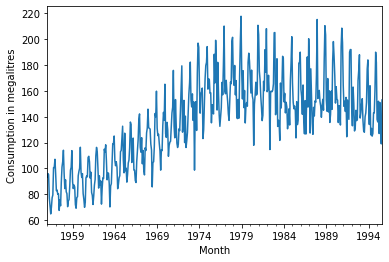

In [12]:
#Parse and Plot
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('monthly-beer-production-in-austr.csv',
                   parse_dates=['Month'], index_col='Month', date_parser=dateparse)

ts = data['Monthly beer production in Australia']
ts.plot()
plt.ylabel("Consumption in megalitres")


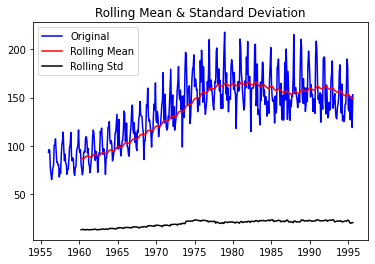

Results of Dickey-Fuller Test:
Test Statistics                 -2.282661
p-value                          0.177621
#Lags Used                      17.000000
Number of Observations Used    458.000000
Critical Value (1%)             -3.444709
Critical Value (5%)             -2.867871
Critical Value (10%)            -2.570142
dtype: float64


In [13]:
#Stationarity Check
from statsmodels.tsa.stattools import adfuller
def test_satationarity(timeseries):
    
    #Determining rolling statistics
    rolmean = timeseries.rolling(window=52, center=False).mean()
    rolstd = timeseries.rolling(window=52, center=False).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #performing Dickey-Fuller Test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags Used'
                                             ,'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_satationarity(data['Monthly beer production in Australia'])

The test statistic is more than critical value and the moving average 
is not constant over time.

So, the null hypothesis of the Dickey-Fuller test cannot be rejected. 
This shows that the time series is not stationary.

In [14]:
l = ts.apply(lambda x : math.log(x))

In [15]:
#ts_log_mv_diff = df.rolling(ts.apply(lambda x: math.log(x)),2).diff(1)
#ts_log_mv_diff.dropna(inplace=True)
#ts_log_mv_diff.plot()

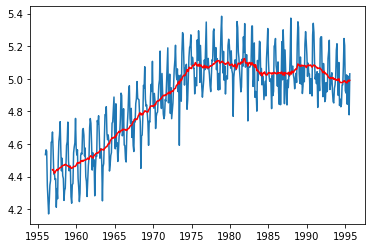

In [16]:
movingAverage = l.rolling(window=12).mean()
movingSTD = l.rolling(window=12).std()
plt.plot(l)
plt.plot(movingAverage, color='red')

In [17]:
# Get the difference between the moving average and the actual number of passengers
ts_log_mv_diff = l- movingAverage
ts_log_mv_diff.head(12)
#Remove Nan Values
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1956-12-01    0.231830
1957-01-01    0.118994
1957-02-01   -0.015558
1957-03-01    0.001590
1957-04-01   -0.041908
1957-05-01   -0.047399
1957-06-01   -0.225688
1957-07-01   -0.117442
1957-08-01   -0.173166
1957-09-01    0.045062
Name: Monthly beer production in Australia, dtype: float64

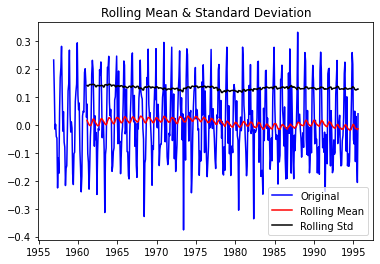

Results of Dickey-Fuller Test:
Test Statistics                 -3.432559
p-value                          0.009898
#Lags Used                      13.000000
Number of Observations Used    451.000000
Critical Value (1%)             -3.444933
Critical Value (5%)             -2.867970
Critical Value (10%)            -2.570195
dtype: float64


In [18]:
test_satationarity(ts_log_mv_diff)

Test statistic < 5 % of critical value. Reject null hypothesis


In [19]:
from statsmodels.tsa.stattools import acf,pacf

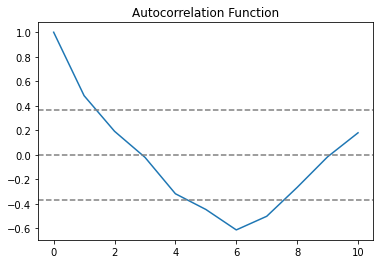

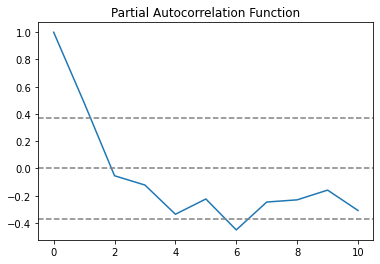

In [20]:
#ACF & PACF
plt.plot(np.arange(0,11), acf(ts_log_mv_diff, nlags = 10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

plt.plot(np.arange(0,11), pacf(ts_log_mv_diff, nlags = 10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

**ACF** curve crosses the upper confidence value when the lag value is between 0 and 1 
Thus, optimal value of q in the ARIMA model must be 0 or 1

The **PACF** curve drops to 0 between lag values 1 and 2 
Thus, optimal value of p in the ARIMA model is 1 or 

In [21]:
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(l, order=(1, 1, 0))
results_ARIMA = model.fit(disp=-1) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0205')

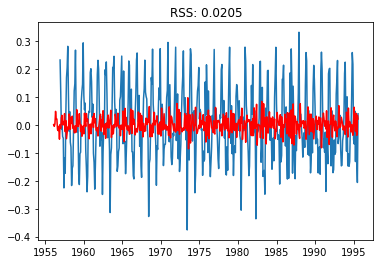

In [22]:
plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%(((results_ARIMA.fittedvalues[1:] - ts_log_mv_diff)**2).mean()))

In [23]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True) 
predictions_ARIMA_diff.head()

Month
1956-02-01    0.000936
1956-03-01   -0.005458
1956-04-01    0.003012
1956-05-01    0.048189
1956-06-01    0.019847
dtype: float64

In [24]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum() 
predictions_ARIMA_diff_cumsum.head() 

Month
1956-02-01    0.000936
1956-03-01   -0.004522
1956-04-01   -0.001510
1956-05-01    0.046680
1956-06-01    0.066527
dtype: float64

In [25]:
predictions_ARIMA_log = pd.Series(l.iat[0], index=l.index) 
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0) 
predictions_ARIMA_log.head()

Month
1956-01-01    4.534748
1956-02-01    4.535684
1956-03-01    4.530226
1956-04-01    4.533238
1956-05-01    4.581428
dtype: float64

Text(0.5, 1.0, 'RMSE: 2.3837')

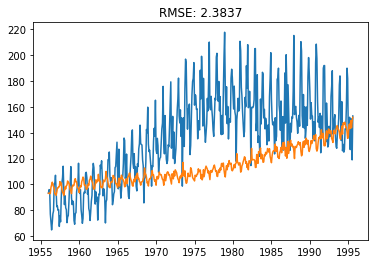

In [26]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts) 
plt.plot(predictions_ARIMA) 
plt.title('RMSE: %.4f'% np.sqrt(((predictions_ARIMA-ts)**2)/(ts)).mean())

In [27]:
print(results_ARIMA.summary())

                                       ARIMA Model Results                                        
Dep. Variable:     D.Monthly beer production in Australia   No. Observations:                  475
Model:                                     ARIMA(1, 1, 0)   Log Likelihood                 285.728
Method:                                           css-mle   S.D. of innovations              0.133
Date:                                    Sun, 07 Aug 2022   AIC                           -565.457
Time:                                            03:55:20   BIC                           -552.967
Sample:                                        02-01-1956   HQIC                          -560.545
                                             - 08-01-1995                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

## Future Prediction Using **ARIMA** Model

In [28]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1956-02-01    0.000936
1956-03-01   -0.005458
1956-04-01    0.003012
1956-05-01    0.048189
1956-06-01    0.019847
dtype: float64


Text(0.5, 1.0, 'RMSE: 37.1218')

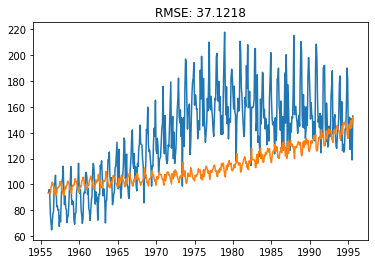

In [29]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(l.iat[0], index=l.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [30]:
size = int(len(l) - 15)
train, test = l[0:size], l[size:len(l)]
history = [x for x in train]
predictions = list()

In [31]:
size = int(len(l) - 15)
train, test = l[0:size], l[size:len(l)]
history = [x for x in train]
predictions = list()

In [32]:
print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    obs = test[t]
    history.append(obs)
print('predicted=%f, expected=%f' % (np.exp(yhat), np.exp(obs)))

Printing Predicted vs Expected Values...


predicted=132.431168, expected=153.000000


In [33]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('\n')
print('Printing Mean Squared Error of Predictions...')
print('Test MSE: %.6f' % error)
predictions_series = pd.Series(predictions, index = test.index)



Printing Mean Squared Error of Predictions...
Test MSE: 0.015666
